# Scoping Project

---

## Topic Modelling and Sentiment Analysis British Airways Individual Review

### Project Overview:
This scope outlines a comprehensive analysis project aimed at understanding and extracting insights from individual reviews of British Airways. The project entails employing advanced natural language processing (NLP) techniques, specifically topic modeling and sentiment analysis, to dissect and categorize the sentiments and topics present within the reviews. The goal is to derive meaningful insights into customers' experiences and perceptions regarding British Airways services.

### Objectives:
1. **Data Collection and Preparation:**
   - Gather a diverse dataset of individual reviews about British Airways from various online platforms.
   - Preprocess and clean the data to ensure consistency and suitability for analysis.

2. **Sentiment Analysis:**
   - Conduct sentiment analysis on the reviews to determine the overall sentiment (positive, negative, or neutral) expressed by the reviewers.
   - Evaluate sentiment trends over time or across different aspects of the airline services.

3. **Topic Modelling:**
   - Utilize topic modeling algorithms, such as Latent Dirichlet Allocation (LDA), to identify and extract underlying topics in the reviews.
   - Assign relevant topics to each review to categorize the subjects discussed by the reviewers.

5. **Insight Generation:**
   - Develop comprehensive reports and visualizations summarizing the results of the topic modeling and sentiment analysis.
   - Extract meaningful insights and patterns that shed light on customer sentiments and the key aspects influencing their perceptions of British Airways.

6. **Recommendations:**
   - Suggest potential improvements or areas of focus for British Airways based on the insights derived from the analysis.
   - Offer strategic recommendations to enhance customer satisfaction and address identified concerns.

# Install Library

BeautifulSoup4 (often abbreviated as bs4) is a popular Python library used for web scraping and parsing HTML/XML documents. It provides easy-to-use methods and Pythonic idioms for navigating, searching, and modifying a parsed HTML/XML tree.

In [453]:
pip install bs4

To conduct topic modeling and sentiment analysis for the British Airways individual review project, I will utilize the spaCy library, a popular and powerful natural language processing (NLP) toolkit in Python. spaCy provides functionalities for various NLP tasks, including text preprocessing, entity recognition, part-of-speech tagging, and dependency parsing, making it suitable for my analysis needs.

In [336]:
pip install spacy

To enhance the natural language processing capabilities for the British Airways individual review project, we'll utilize TextBlob, a Python library built on top of NLTK (Natural Language Toolkit) and Pattern. TextBlob simplifies text processing in Python and provides functionalities such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [337]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


To enhance the visualization of text data, you intend to install the WordCloud library using pip. The WordCloud library allows for the creation of visually appealing word clouds, a popular visualization technique for displaying the most frequent words in a given text.

In [412]:
pip install WordCloud

In [413]:
# Data Scrapping
import requests
from bs4 import BeautifulSoup
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
# Text Processing
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [132]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []
dates = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    for para in parsed_content.find_all("time", itemprop="datePublished"):
        dates.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1


   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [133]:
# Creating a DataFrame to organize review data
dataset = {
  'reviews': reviews,
  'date': dates
}
# This DataFrame will facilitate further analysis and exploration of the review data
df = pd.DataFrame(dataset)
df

,reviews,date
0,"✅ Trip Verified | I had a flight from Miami, F...",23rd September 2023
1,✅ Trip Verified | We started our day with BA ...,22nd September 2023
2,✅ Trip Verified | I fly British Airways weekl...,22nd September 2023
3,Not Verified | Everything was ok until our co...,20th September 2023
4,Not Verified | My initial flight was cancelle...,20th September 2023
...,...,...
1995,✅ Verified Review | Had pre-booked seat 14k a...,24th October 2016
1996,London Heathrow to Las Vegas. Outbound great w...,23rd October 2016
1997,"✅ Verified Review | Tokyo Haneda to London, a...",23rd October 2016
1998,✅ Verified Review | I had a perfectly satisfa...,23rd October 2016


In [134]:
# Saving the DataFrame to a CSV file for further analysis
df.to_csv("BA_reviews.csv")

In [357]:
# Loading data from the CSV file "BA_reviews.csv" into a DataFrame for analysis
df = pd.read_csv("BA_reviews.csv")

## Early Data Cleaning and Data Profiling

In [358]:
# Split the 'reviews' column into 'Verification' and 'Review' based on '|'
df[['Verification', 'Review']] = df['reviews'].str.split('|', 1, expand=True)

# If there is no '|', assign the entire content to 'Review'
df['Review'].fillna(df['reviews'], inplace=True)

# Drop the original "reviews" column
df.drop(columns=['reviews'], inplace=True)

# Remove leading and trailing whitespace from the new columns
df['Verification'] = df['Verification'].str.strip()
df['Review'] = df['Review'].str.strip()

# Reset the index and drop the old index
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df.head(10)

C:\Users\Wawan'\AppData\Local\Temp\ipykernel_4168\3401532652.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Verification', 'Review']] = df['reviews'].str.split('|', 1, expand=True)


,Unnamed: 0,date,Verification,Review
0,0,23rd September 2023,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin, ..."
1,1,22nd September 2023,✅ Trip Verified,We started our day with BA in Prague. The flig...
2,2,22nd September 2023,✅ Trip Verified,I fly British Airways weekly not because I wan...
3,3,20th September 2023,Not Verified,Everything was ok until our connecting flight ...
4,4,20th September 2023,Not Verified,My initial flight was cancelled 8 hours prior ...
5,5,19th September 2023,Not Verified,We will never fly British Airways again. Our f...
6,6,18th September 2023,✅ Trip Verified,Check in and security clearance very quick at ...
7,7,16th September 2023,Not Verified,British Airways has confirmed itself as the wo...
8,8,15th September 2023,✅ Trip Verified,Worst BA experience. I was supposed to fly out...
9,9,13th September 2023,✅ Trip Verified,My daughter and I were denied boarding on our ...


Drop unnecessary column

In [359]:
# The 'Verification' column is removed from the DataFrame to streamline the data structure
df.drop('Verification', axis=1)
# The DataFrame 'df' is modified to retain only 'date' and 'Review' columns
df = df[['date','Review']]

In [360]:
df

,date,Review
0,23rd September 2023,"I had a flight from Miami, Florida to Dublin, ..."
1,22nd September 2023,We started our day with BA in Prague. The flig...
2,22nd September 2023,I fly British Airways weekly not because I wan...
3,20th September 2023,Everything was ok until our connecting flight ...
4,20th September 2023,My initial flight was cancelled 8 hours prior ...
...,...,...
1995,24th October 2016,"Had pre-booked seat 14k and, on taking seat, n..."
1996,23rd October 2016,London Heathrow to Las Vegas. Outbound great w...
1997,23rd October 2016,"Tokyo Haneda to London, and British Airways is..."
1998,23rd October 2016,I had a perfectly satisfactory flight with Bri...


Check missing value

In [361]:
# Calculating the count of missing values in each column of the DataFrame 'df'
df.isnull().sum()

date      0
Review    0
dtype: int64

Check whitespace

In [362]:
# Identifying rows with empty or whitespace-only values in 'date' and 'Review' columns
# This code iterates through the DataFrame 'df', detecting and storing indices of rows with empty or whitespace-only values
blanks_dt = [] # List to store indices of empty 'date'
blanks_rv = []# List to store indices of empty 'Review'
for i,dt,rv in df.itertuples():
  if type(dt) == str:
    if dt.isspace():
      blanks_dt.append(i)
  if type(rv) == str:
    if rv.isspace():
      blanks_rv.append(i)
     

In [363]:
print(f'white space for date: {len(blanks_dt)} \nwhite space for review: {len(blanks_rv)} \n')

white space for date: 0 
white space for review: 0 



After performing for loop the result of the dataframe has no whitespace

In [364]:
# Extracting month and year from the 'date' column and adding as new columns
# Two new columns, 'flightMonth' and 'flightYear', are added to the DataFrame 'df' based on the 'date' column

df['flightMonth'] = pd.DatetimeIndex(df['date']).month # Extracting month from 'date' and creating 'flightMonth'
df['flightYear'] = pd.DatetimeIndex(df['date']).year # Extracting year from 'date' and creating 'flightYear'
df

,date,Review,flightMonth,flightYear
0,23rd September 2023,"I had a flight from Miami, Florida to Dublin, ...",9,2023
1,22nd September 2023,We started our day with BA in Prague. The flig...,9,2023
2,22nd September 2023,I fly British Airways weekly not because I wan...,9,2023
3,20th September 2023,Everything was ok until our connecting flight ...,9,2023
4,20th September 2023,My initial flight was cancelled 8 hours prior ...,9,2023
...,...,...,...,...
1995,24th October 2016,"Had pre-booked seat 14k and, on taking seat, n...",10,2016
1996,23rd October 2016,London Heathrow to Las Vegas. Outbound great w...,10,2016
1997,23rd October 2016,"Tokyo Haneda to London, and British Airways is...",10,2016
1998,23rd October 2016,I had a perfectly satisfactory flight with Bri...,10,2016


In [365]:
# Dropping the 'date' column from the DataFrame 'df'
# This operation removes the 'date' column to streamline the DataFrame for subsequent analysis

df.drop('date', axis=1,inplace=True)

<Axes: xlabel='flightYear', ylabel='count'>

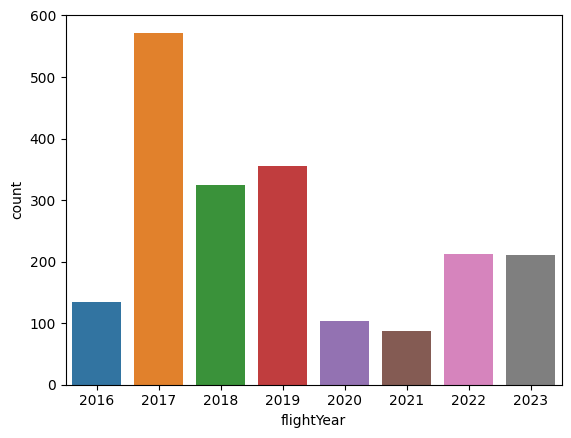

In [366]:
# Creating a count plot to visualize the distribution of flight observations for each year
# This plot displays the counts of observations for each flight year based on the DataFrame 'df'

sns.countplot(data=df, x="flightYear")

Data represents the count of flight observations for each respective year. Here's a description of the flight observations count by year:

- **2017:** In 2017, there were a total of 572 flight observations recorded, indicating a relatively high volume of flights for that year.

- **2019:** The year 2019 had 356 flight observations, suggesting a significant number of recorded flights during that period.

- **2018:** In 2018, there were 324 flight observations, indicating a moderate volume of flights for that year.

- **2022:** For the year 2022, there were 213 flight observations, indicating a noticeable volume of flights.

- **2023:** In the ongoing year, 2023, there have been 210 flight observations recorded up to the present time.

- **2016:** In 2016, there were 134 flight observations, indicating a lower volume of flights compared to subsequent years.

- **2020:** The year 2020 had 104 flight observations, suggesting a lower number of recorded flights, potentially influenced by external factors like the COVID-19 pandemic.

- **2021:** In 2021, there were 87 flight observations, indicating a relatively lower volume of flights compared to previous and subsequent years.

These counts provide an overview of the distribution of flight observations across different years, which can be valuable for analyzing trends, identifying potential anomalies, and understanding the dataset's temporal characteristics.

create df copy for spesifically use for sentiment analysis

In [367]:
df_sentiment = df.copy()

1. **Loading spaCy Model:**
   - The first step involves loading the spaCy language model, specifically the "en_core_web_lg" model, which is optimized for English language processing. This model contains components such as a tokenizer, part-of-speech tagger, parser, named entity recognizer (NER), and word vectors.

2. **Preprocessing Function:**
   - The `preprocess_text` function defines a standardized approach to clean and preprocess text data.
   - **Lowercasing**: It converts all text to lowercase, ensuring uniformity and reducing the complexity of distinguishing between different cases of the same word.
   - **Tokenization and Lemmatization**: Tokenization breaks down the text into individual words or tokens, and lemmatization reduces these tokens to their base or root forms. This is crucial for standardizing variations of words (e.g., "running" to "run").
   - **Removing Short Words**: It eliminates words with only one character, which often carry little meaning and might introduce noise into the analysis.
   - **Joining Tokens**: The tokens are then joined back into a cohesive string for ease of analysis and further processing.

Purpose of this text preprocessing is to prepare the raw text data for analysis, particularly sentiment analysis in this context. Text preprocessing enhances the quality of the text by standardizing and cleaning it, making it more suitable for subsequent analytical tasks. By converting the text into a structured and normalized format, it improves the accuracy and effectiveness of any models or analysis performed downstream. Additionally, the preprocessing steps help to handle common issues in text data, such as variations in case and word forms, and reduce the dimensionality of the data by removing less informative elements.

In [368]:
# Load English tokenizer, POS tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_lg")

# Function to clean and preprocess a text (without removing stop words)
def preprocess_text(text):
    # Clean and tokenize document string
    doc = nlp(text.lower())

    # Lemmatize tokens
    lemma_tokens = [token.lemma_ for token in doc if token.is_alpha]

    # Remove words containing only a single character
    new_lemma_tokens = [lemma for lemma in lemma_tokens if len(lemma) > 1]

    # Join the tokens back into a string
    processed_text = ' '.join(new_lemma_tokens)
    
    return processed_text

# Apply the preprocessing function to 'titles' and 'review' columns
df_sentiment['review_processed'] = df_sentiment['Review'].apply(preprocess_text)

# Display the processed texts
print(df_sentiment['review_processed'])

0       have flight from miami florida to dublin irela...
1       we start our day with ba in prague the flight ...
2       fly british airways weekly not because want to...
3       everything be ok until our connect flight in l...
4       my initial flight be cancel hour prior the fli...
                              ...                        
1995    have pre booked seat and on take seat notice r...
1996    london heathrow to las vegas outbound great we...
1997    tokyo haneda to london and british airways be ...
1998    have perfectly satisfactory flight with britis...
1999    san francisco to manchester via heathrow margi...
Name: review_processed, Length: 2000, dtype: object


The purpose of this function is to provide a convenient way to display the content of a review, ensuring that the text is presented in a readable format. The formatting enhances the readability, and the truncation feature ensures that the review can be viewed within a limited space or for a quick overview of the text.

In [369]:
def print_review(data,column='Review',index=0):
  content = data[column][index]
  print("\n".join([content[i:i+100] for i in range(0, len(content), 100)]))

  # Truncate the content to fit within the visible area
  content = data[column][index]
  max_length = 100  # Maximum characters per line
  print(content[:max_length])

**Before Text Processing**

In [370]:
print_review(df_sentiment,'Review',0)

I had a flight from Miami, Florida to Dublin, Ireland, via London's Heathrow airport. The outbound f
light from Miami was delayed and we were further delayed when our gate was occupied when we arrived 
in Heathrow. The total delay was roughly an hour, but it was enough to make our connection a challen
ge, where we had 73 minutes between original arrival time until the departure time to Dublin. When w
e headed to our connection flight, we were stopped by security personnel at a checkpoint and told us
 that the gate to our connection flight had already closed. This was twenty minutes prior to departu
re time. They ushered us to customer service to be rebooked. Given the busy weekend of travel, we we
re rebooked on a flight at a different airport and were told that our cost to get there would be rei
mbursed. We then waited 3 hours for our luggage, and then took a cab to London's City Airport. The c
ab fare was roughly $500. When I filed a claim with British Airways, they refused the claim

In [371]:
print_review(df_sentiment,'Review',13)

4/4 flights we booked this holiday were delayed about 1-2 hours. No wifi available on 2 of 4 flights
 Food and drinks very basic and expensive. Cannot recommend
4/4 flights we booked this holiday were delayed about 1-2 hours. No wifi available on 2 of 4 flights


In [372]:
print_review(df_sentiment,'Review',66)

Airport check in was functionary with little warmth but some efficiency. Flight was delayed with no 
communication given. Boarding was chaotic and no management of the process by ground staff. Seats on
 board are tight and you really feel like they have crammed in every seat possible. There is next to
 no recline. However I was thankful that there was no recline. If the person in front had even the s
lightest recline they would be in my face owing to how tight the seats were spaced on this A321 airc
raft. No amenities on this flight except for a toilet that was clean but small. No IFE, no food and 
beverage unless you pay extra but the staff were friendly. Luggage arrived at the carousel within a 
very short amount of time.
Airport check in was functionary with little warmth but some efficiency. Flight was delayed with no 


**After Text Processing**

In [373]:
print_review(df_sentiment,'review_processed',0)

have flight from miami florida to dublin ireland via london heathrow airport the outbound flight fro
m miami be delay and we be far delay when our gate be occupy when we arrive in heathrow the total de
lay be roughly an hour but it be enough to make our connection challenge where we have minute betwee
n original arrival time until the departure time to dublin when we head to our connection flight we 
be stop by security personnel at checkpoint and tell we that the gate to our connection flight have 
already close this be twenty minute prior to departure time they usher we to customer service to be 
rebooke give the busy weekend of travel we be rebooke on flight at different airport and be tell tha
t our cost to get there would be reimburse we then wait hour for our luggage and then take cab to lo
ndon city airport the cab fare be roughly when file claim with british airways they refuse the claim
 and tell that we have plenty of time to make our connect flight and therefore they deny my

In [374]:
print_review(df_sentiment,'review_processed',13)

flight we book this holiday be delay about hour no wifi available on of flight food and drink very b
asic and expensive can not recommend
flight we book this holiday be delay about hour no wifi available on of flight food and drink very b


In [375]:
print_review(df_sentiment,'review_processed',66)

airport check in be functionary with little warmth but some efficiency flight be delay with no commu
nication give boarding be chaotic and no management of the process by ground staff seat on board be 
tight and you really feel like they have cram in every seat possible there be next to no recline how
ever be thankful that there be no recline if the person in front have even the slight recline they w
ould be in my face owe to how tight the seat be space on this aircraft no amenity on this flight exc
ept for toilet that be clean but small no ife no food and beverage unless you pay extra but the staf
f be friendly luggage arrive at the carousel within very short amount of time
airport check in be functionary with little warmth but some efficiency flight be delay with no commu


# Sentiment Analysis

In [376]:
# Sentiment Analysis and Tagging
# This code segment focuses on sentiment analysis of the preprocessed reviews by calculating polarity scores 
# using TextBlob's sentiment analysis. The polarity scores are then mapped to sentiment tags 
# ('Negative', 'Neutral', or 'Positive') for easy interpretation and further analysis.

# Polarity Calculation Function

def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_cal(num):
    if num<0.05:
        return 'Negative'
    elif num>0.05:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df_sentiment['polarity'] = df_sentiment['review_processed'].apply(polarity_calc)


df_sentiment['tag'] = df_sentiment['polarity'].apply(tag_cal)


df_sentiment

,Review,flightMonth,flightYear,review_processed,polarity,tag
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Positive
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative
...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Positive
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Positive
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Positive


Sentiment analysis categorizes the emotional tone expressed in a piece of text into various sentiment classes. The most common sentiment classes are 'negative', 'neutral', and 'positive', representing the range of emotions or opinions conveyed in the text.

1. **Negative Sentiment:**
   - **Definition:** Negative sentiment indicates an unfavorable or pessimistic opinion, emotion, or viewpoint expressed in the text.
   - **Characteristics:**
     - Criticism: Expressing disapproval or dissatisfaction.
     - Unhappiness: Conveying sadness, anger, frustration, or disappointment.
     - Negativity: Use of negative words, phrases, or expressions.

2. **Neutral Sentiment:**
   - **Definition:** Neutral sentiment implies a lack of strong emotion, bias, or leaning towards either a positive or negative viewpoint.
   - **Characteristics:**
     - Lack of Bias: The text presents information without a discernible positive or negative leaning.
     - Objective: Providing facts or descriptions without adding emotional influence.
     - General Statements: Making statements that do not convey strong opinions.

3. **Positive Sentiment:**
   - **Definition:** Positive sentiment conveys a favorable or optimistic opinion, emotion, or perspective expressed in the text.
   - **Characteristics:**
     - Approval: Expressing agreement, satisfaction, or contentment.
     - Happiness: Conveying joy, enthusiasm, or positive feelings.
     - Positivity: Use of positive words, phrases, or expressions.

**Double check positive analysis if still contain negative or neutral sentiment**

In [377]:
df_sentiment[df_sentiment['tag']=='Positive']

,Review,flightMonth,flightYear,review_processed,polarity,tag
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Positive
6,Check in and security clearance very quick at ...,9,2023,check in and security clearance very quick at ...,0.254266,Positive
8,Worst BA experience. I was supposed to fly out...,9,2023,bad ba experience be suppose to fly out to ita...,0.103704,Positive
9,My daughter and I were denied boarding on our ...,9,2023,my daughter and be deny boarding on our busine...,0.064063,Positive
10,Despite boarding being the usual free for all ...,9,2023,despite boarding be the usual free for all at ...,0.273718,Positive
...,...,...,...,...,...,...
1994,London Gatwick - Pisa Return. Another less tha...,10,2016,london gatwick pisa return another less than s...,0.190772,Positive
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Positive
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Positive
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Positive


In [378]:
print_review(df_sentiment[df_sentiment['tag']=='Positive'],'Review',2)

I fly British Airways weekly not because I want to but because they own the route there’s no other o
ption therefore they frankly don’t have to care about the customer. The flights are always delayed a
nd it’s always someone else’s fault be it weather delays to incoming aircraft or flight traffic cont
rol issues I’ve heard it all and for the life of me cannot understand why they are allowed to operat
e. I’ve been around the world and traveled with all of the world’s airlines but British Airways are 
really the worst of the worst. It’s such a shame to have watched what used to be a good company fall
 down a cliff. My advice is if you have an option to fly with anyone else then exercise the option b
ut if you’re flying with different connections and you have a tight schedule do not expect BA to get
 you to your destination in time.
I fly British Airways weekly not because I want to but because they own the route there’s no other o


It still show negative comment with polarity score 0.148558

In [379]:
print_review(df_sentiment[df_sentiment['tag']=='Positive'],'Review',8)

Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo I
nternational airport ready to check my bags in (I already checked-in online the previous evening so 
I had my boarding pass ready). At the counter I was told that I had been off-loaded from the flight 
as my connecting flight has been cancelled. No information was sent regarding this beforehand. The t
eam at the check-in counter tried to get me on another flight that evening, but there were no flight
s available. They did manage to get me another flight the following evening with Lufthansa to Italy 
via Frankfurt. However, I did miss the first part of my trip having arrived a day and a half later t
han I was supposed to. Upon moving the flights I did ask the BA staff whether my flights back are st
ill valid and that everything is in order, which they assured me is correct. I have to fly back to S
outh Africa on 18 September and upon checking my booking information I noticed on my BA acc

It still show negative comment with polarity score 0.103704

In [380]:
positive = df_sentiment[df_sentiment['tag']=='Positive']

Double check sentiment analysis with polarity near 0.2

In [381]:
positive[positive['polarity']>=0.2].sort_values(by='polarity',ascending=True)

,Review,flightMonth,flightYear,review_processed,polarity,tag
1229,London to Belfast. Another regular flight by B...,3,2018,london to belfast another regular flight by br...,0.200000,Positive
1617,My wife and I flew British Airways from London...,5,2017,my wife and fly british airways from london he...,0.200000,Positive
977,Gatwick to Barbados. We flew out of Gatwick on...,12,2018,gatwick to barbados we fly out of gatwick on t...,0.200183,Positive
1351,London to Philadelphia. Ticket booked was an A...,11,2017,london to philadelphia ticket book be an amex ...,0.200218,Positive
1703,London to New York. It has been a long time si...,4,2017,london to new york it have be long time since ...,0.200489,Positive
...,...,...,...,...,...,...
692,Flew from London Heathrow to Abu Dhabi. Honest...,10,2019,fly from london heathrow to abu dhabi honestly...,0.628571,Positive
268,Good flight apart from my seat fabric was comi...,9,2022,good flight apart from my seat fabric be come ...,0.650000,Positive
291,"For this 5 hour 15 min flight, you are given a...",7,2022,for this hour min flight you be give bag of po...,0.650000,Positive
636,Stockholm to London Heathrow. As always BA wor...,12,2019,stockholm to london heathrow as always ba work...,0.666667,Positive


In [382]:
print_review(positive[positive['polarity']>=0.2],'Review',1229)

London to Belfast. Another regular flight by British Airways, which has turned into a low cost airli
ne, given the total no frills service they provide. The staff are extremely nice and polite, but in 
the short haul flights you only get luggage. The flight went perfectly, departing and arriving on ti
me.
London to Belfast. Another regular flight by British Airways, which has turned into a low cost airli


it show polarity 0.2 is neutral sentiment

In [387]:
positive[positive['polarity']<0.199].sort_values(by='polarity', ascending=False)

,Review,flightMonth,flightYear,review_processed,polarity,tag
229,During both the outbound and return flights we...,12,2022,during both the outbound and return flight we ...,0.198810,Positive
1001,Vancouver to London Heathrow. I chose to fly w...,11,2018,vancouver to london heathrow choose to fly wit...,0.198188,Positive
154,First time flying with British Airways and fir...,3,2023,first time fly with british airways and first ...,0.198037,Positive
425,"Overall, a very lovely flight with BA to Edinb...",12,2021,overall very lovely flight with ba to edinburg...,0.197908,Positive
433,I claimed my miles right after my trip at the ...,12,2021,claim my mile right after my trip at the begin...,0.197619,Positive
...,...,...,...,...,...,...
1382,Pisa to Gatwick. I fly this route often as I h...,10,2017,pisa to gatwick fly this route often as have h...,0.050259,Positive
558,London to Paris return group booking cancelled...,3,2020,london to paris return group booking cancel kn...,0.050253,Positive
1318,Flew British Airways from Dubai to London Heat...,12,2017,fly british airways from dubai to london heath...,0.050017,Positive
345,British Airways continues to decline in custom...,5,2022,british airways continue to decline in custome...,0.050000,Positive


In [388]:
print_review(positive[positive['polarity']<0.199],'Review',229)

During both the outbound and return flights we were not offered a decent meal. We received a tiny ba
g of chips and a very small bottle of water. What outraged us the most is that during the return fli
ght we couldn't even order any food / drink because the card reader didn't function. The first and l
ast time we'll fly with BA.
During both the outbound and return flights we were not offered a decent meal. We received a tiny ba


After checking polarity below it show the comments already negative

In [389]:
print_review(positive[positive['polarity']<=0.2],'Review',1001)

Vancouver to London Heathrow. I chose to fly with them because I had been told they were good for fa
milies and as I was traveling with my 8 month old alone this was what I needed. The booking process 
was not smooth and very stressful, I have to call customer service multiple times and they need to i
mprove their customer service call center. The 2 flights were great though, the staff both on the gr
ound and in the air were very helpful and did everything they could to ensure I was doing ok. The cr
ew came around often with drinks and the food was ok I was first given a cot for my baby. I original
ly wanted a one of the Britax seats they have but was talked out it saying my baby would be more com
fortable in the cot, nope! He was too big and could not lie straight so I asked for it to be switche
d out and he was asleep with 15 minutes. All the toilets in economy were out of order at least 3 hou
rs before we reached our destination so everyone had to used the business class toilets, I'

after check the sample of the comment, lets see the distribution of tag

In [390]:
df_sentiment

,Review,flightMonth,flightYear,review_processed,polarity,tag
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Positive
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative
...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Positive
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Positive
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Positive


<Axes: xlabel='polarity', ylabel='Count'>

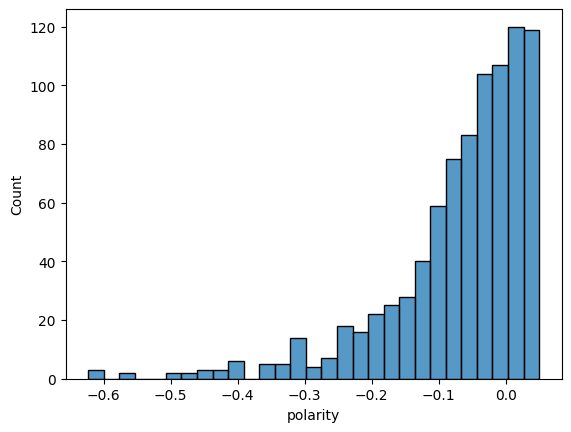

In [391]:
sns.histplot(df_sentiment.polarity[df_sentiment['tag'] == 'Negative'] , kde=False)

Negative sentiment start from below -0.6 until between 0.0 and 0.1

<Axes: >

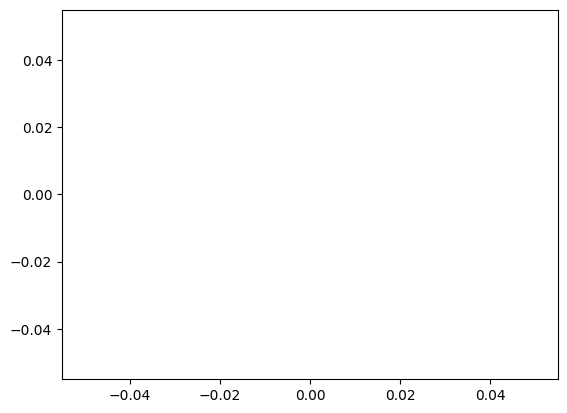

In [190]:
sns.histplot(df_sentiment.polarity[df_sentiment['tag'] == 'Neutral'] , kde=False)

No neutral sentiment has been tag

<Axes: xlabel='polarity', ylabel='Count'>

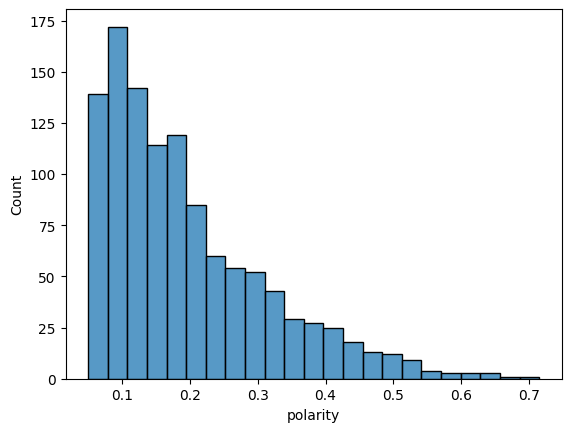

In [191]:
sns.histplot(df_sentiment.polarity[df_sentiment['tag'] == 'Positive'] , kde=False)

positive sentiment distribution start aroung 0.05 until aboce 0.7

In [392]:
df_sentiment['tag'].value_counts()

Positive    1128
Negative     872
Name: tag, dtype: int64

after this observation we will put new threshold for polarity to define sentiment more accurately using statistic descriptive

remove old tagger to precess new tag for sentiment

In [393]:
df_sentiment.drop('tag',axis=1)

,Review,flightMonth,flightYear,review_processed,polarity
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330
...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667


due to our last observation we know our negative sentiment max polarity scoreis below 0.199, i will put as the threshold of negative sentiment

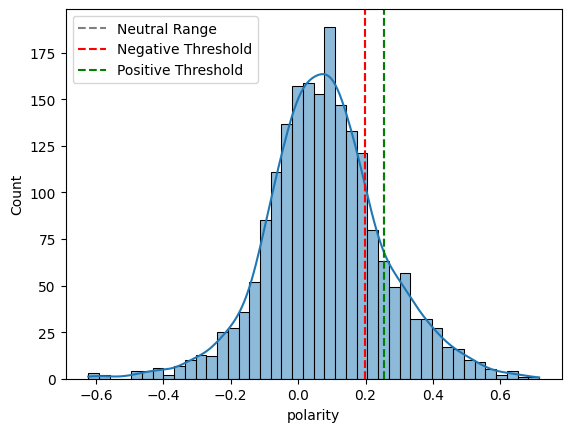

In [394]:
# Calculate statistics
mean_polarity = np.mean(df_sentiment['polarity'])
std_polarity = np.std(df_sentiment['polarity'])

# Define thresholds
negative_threshold = 0.199
positive_threshold = mean_polarity + std_polarity

# Define the range for neutral
neutral_min = negative_threshold
neutral_max = positive_threshold

# Classification based on thresholds
def tag_cal(num):
    if num < neutral_min:
        return 'Negative'
    elif num > neutral_max:
        return 'Positive'
    else:
        return 'Neutral'

# Apply the classification
df_sentiment['tag'] = df_sentiment['polarity'].apply(tag_cal)

# Visualize the distribution of polarity scores
sns.histplot(df_sentiment['polarity'], kde=True)
plt.axvline(neutral_min, color='grey', linestyle='--', label='Neutral Range')
plt.axvline(neutral_max, color='grey', linestyle='--')
plt.axvline(negative_threshold, color='r', linestyle='--', label='Negative Threshold')
plt.axvline(positive_threshold, color='g', linestyle='--', label='Positive Threshold')
plt.legend()
plt.show()

In [395]:
print(f'negative threshold : {negative_threshold} \nneutral min threshold : {neutral_min} \nneutral max threshold : {neutral_max} \npositive threshold : {positive_threshold} ')

negative threshold : 0.199 
neutral min threshold : 0.199 
neutral max threshold : 0.2551698420437143 
positive threshold : 0.2551698420437143 


After performing statistical descriptive analysis, thresholds for sentiment classification have been determined based on the calculated sentiment scores. These thresholds help categorize sentiment into 'negative', 'neutral', and 'positive' based on the sentiment scores obtained from the analysis.

1. **Negative Threshold (≤ 0.199):**
   - Sentiment scores less than or equal to 0.199 are categorized as 'negative'.
   - This threshold indicates the lower limit for negative sentiment scores, where sentiment is predominantly unfavorable or pessimistic.

2. **Neutral Threshold (0.199 < x ≤ 0.2551698420437143):**
   - Sentiment scores greater than 0.199 but less than or equal to 0.2551698420437143 fall within the 'neutral' range.
   - This range represents a neutral sentiment, indicating a lack of strong positive or negative emotions.

3. **Positive Threshold (> 0.2551698420437143):**
   - Sentiment scores greater than 0.2551698420437143 are categorized as 'positive'.
   - This threshold marks the lower limit for positive sentiment scores, where sentiment is predominantly favorable or optimistic.

In [396]:
negative = df_sentiment[df_sentiment['polarity'] < 0.199]
negative

,Review,flightMonth,flightYear,review_processed,polarity,tag
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Negative
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative
...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Negative
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Negative
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Negative


In [397]:
neutral = df_sentiment[(df_sentiment['polarity'] > 0.199) & (df_sentiment['polarity'] < 0.2551698420437143 )]
neutral

,Review,flightMonth,flightYear,review_processed,polarity,tag
6,Check in and security clearance very quick at ...,9,2023,check in and security clearance very quick at ...,0.254266,Neutral
16,Mumbai to London Heathrow in Business Class on...,9,2023,mumbai to london heathrow in business class on...,0.228499,Neutral
32,My family flew from Washington to London on a ...,8,2023,my family fly from washington to london on bri...,0.211458,Neutral
34,"Flight delayed by an hour, it happens, no bigg...",8,2023,flight delay by an hour it happen no biggie ha...,0.225000,Neutral
36,Good domestic flight operated by BA Cityflyer....,8,2023,good domestic flight operate by ba cityflyer g...,0.247222,Neutral
...,...,...,...,...,...,...
1896,IAD-LHR return in World Traveller Plus. Quite ...,12,2016,iad lhr return in world traveller plus quite e...,0.229424,Neutral
1942,London Gatwick to Barbados with British Airway...,11,2016,london gatwick to barbados with british airway...,0.215385,Neutral
1967,London Heathrow to Kuala Lumpur. Concorde loun...,11,2016,london heathrow to kuala lumpur concorde loung...,0.209836,Neutral
1981,Flew London Heathrow to Cape Town via Johannes...,11,2016,fly london heathrow to cape town via johannesb...,0.226111,Neutral


In [398]:
positive = df_sentiment[df_sentiment['polarity'] >= 0.2551698420437143 ]
positive

,Review,flightMonth,flightYear,review_processed,polarity,tag
10,Despite boarding being the usual free for all ...,9,2023,despite boarding be the usual free for all at ...,0.273718,Positive
28,"Nice flight, good crew, very good seat, food w...",8,2023,nice flight good crew very good seat food be w...,0.272819,Positive
41,I had the most fantastic BA Flight today. The ...,8,2023,have the most fantastic ba flight today the ca...,0.370955,Positive
42,Couldn’t book in online. Arrived at check in t...,7,2023,could book in online arrive at check in to fin...,0.258333,Positive
43,London Heathrow to Mumbai in a Boeing 787-8 in...,7,2023,london heathrow to mumbai in boeing in busines...,0.262005,Positive
...,...,...,...,...,...,...
1973,It does seem that many of the negative reviews...,11,2016,it do seem that many of the negative review of...,0.352188,Positive
1980,I have traveled with British Airways many time...,11,2016,have travel with british airways many time in ...,0.427500,Positive
1983,I hadn't flown British Airways in a while but ...,10,2016,have fly british airway in while but think giv...,0.501146,Positive
1986,"I was pleasantly surprised by the experience, ...",10,2016,be pleasantly surprised by the experience firs...,0.260218,Positive


In [399]:
negative.polarity.sort_values(ascending=False)

229     0.198810
1001    0.198188
154     0.198037
425     0.197908
433     0.197619
          ...   
385    -0.562500
776    -0.566667
12     -0.600000
957    -0.613333
945    -0.622917
Name: polarity, Length: 1572, dtype: float64

In [400]:
print_review(negative,'Review',229)

During both the outbound and return flights we were not offered a decent meal. We received a tiny ba
g of chips and a very small bottle of water. What outraged us the most is that during the return fli
ght we couldn't even order any food / drink because the card reader didn't function. The first and l
ast time we'll fly with BA.
During both the outbound and return flights we were not offered a decent meal. We received a tiny ba


In [401]:
neutral.polarity.sort_values(ascending=True)

1264    0.200000
807     0.200000
1229    0.200000
1617    0.200000
977     0.200183
          ...   
1460    0.251389
1474    0.253378
1701    0.253571
6       0.254266
529     0.255000
Name: polarity, Length: 135, dtype: float64

In [402]:
print_review(neutral,'Review',1264)

Johannesburg to Cape Town. A really basic flight operated by Comair. No inflight entertainment. You 
had a USB plug to charge your phone. They served breakfast - it was early in the morning. Overall a 
flight with no problems. The ground and air staff was good.
Johannesburg to Cape Town. A really basic flight operated by Comair. No inflight entertainment. You 


In [403]:
print_review(neutral,'Review',529)

A short hop from London to Edinburgh in November 2019 - efficient, clean and punctual. The airport e
xperience was straightforward and I think flying from City you get simplicity but miss out on the bi
gger aircraft which are a bit more comfortable. I got my luggage quickly at the other end and I appr
eciated having a wide range of flight times to choose from.
A short hop from London to Edinburgh in November 2019 - efficient, clean and punctual. The airport e


In [404]:
positive.polarity.sort_values(ascending=True)

563     0.255189
1338    0.255656
195     0.255682
184     0.256389
254     0.256563
          ...   
692     0.628571
268     0.650000
291     0.650000
636     0.666667
659     0.715000
Name: polarity, Length: 293, dtype: float64

In [206]:
print_review(positive,'Review',563)

London to Delhi. This booking was part of a holiday group format so we had to check in as opposed to
 bag drop. According to the check in screen, all zones were applicable for our destination, but we w
ere sent from one zone to the next; (which, given the size of the T5 check in hall wasn't helpful) E
ventually, we managed to find assistance but it was very much a shrug of the shoulder attitude - esp
ecially when we discovered we were seated separately; it was only when a family with two young child
ren had been split up that we were able to switch seats. Fortunately, the cabin crew made up for thi
s by providing a fabulous flight, with great service and positive, friendly attitude. I actually pra
ised them and told them that my faith in BA had been restored!
London to Delhi. This booking was part of a holiday group format so we had to check in as opposed to


In [207]:
print_review(positive,'Review',659)

Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great c
abin crew. Excellent Service.
Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great c


after double check the content review the our threshold already accurate

In [405]:
def tag_cal(num):
    if num<negative_threshold:
        return 'Negative'
    elif num>positive_threshold:
        return 'Positive'
    else:
        return 'Neutral'

df_sentiment['tag'] = df_sentiment['polarity'].apply(tag_cal)

df_sentiment

,Review,flightMonth,flightYear,review_processed,polarity,tag
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Negative
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative
...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Negative
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Negative
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Negative


count the value of our sentiment

In [406]:
df_sentiment['tag'].value_counts()

Negative    1572
Positive     293
Neutral      135
Name: tag, dtype: int64

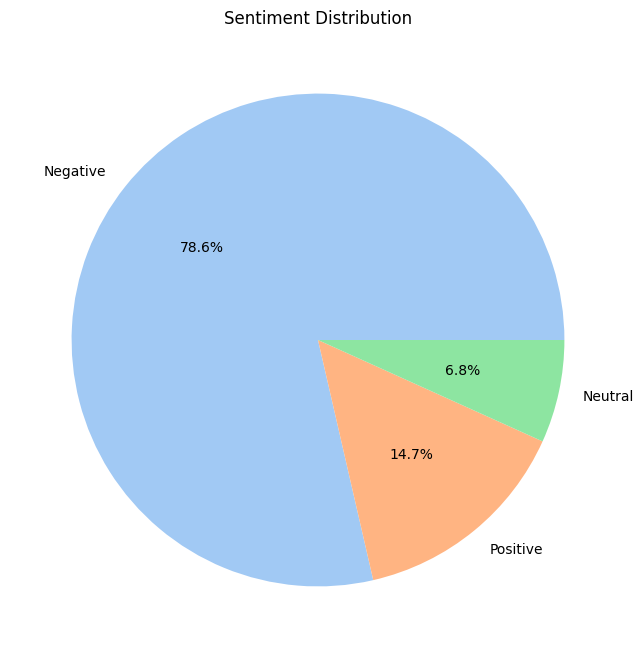

In [407]:
# Count the occurrences of each sentiment tag
sentiment_counts = df_sentiment['tag'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Distribution')
plt.show()

Our negtive sentiment is 78.6% from all data review that has been record

sentiment by year

<Axes: xlabel='flightYear', ylabel='count'>

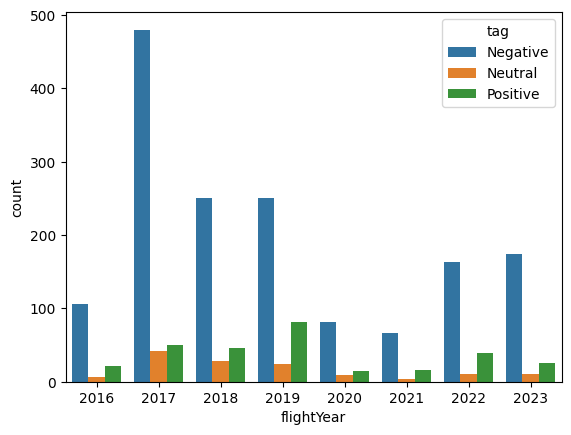

In [408]:
sns.countplot(data=df_sentiment, x="flightYear", hue='tag')

the most negative sentiment is happen in 2017, for a short insight we will find which month of 2017 that negative sentiment occure

<Axes: xlabel='flightMonth', ylabel='count'>

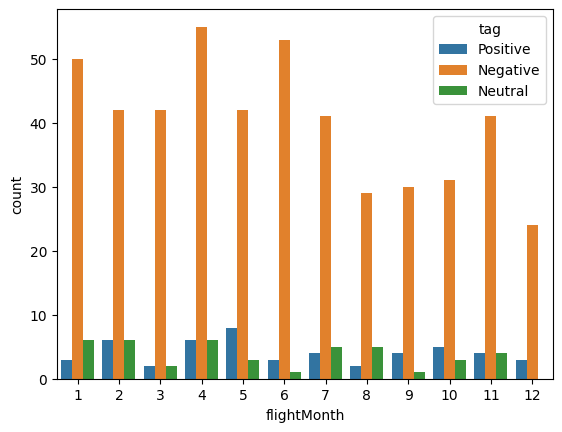

In [411]:
sns.countplot(data=df_sentiment[df_sentiment['flightYear']==2017], x="flightMonth", hue='tag')

negative sentiment most large in every month, but the most high negative sentiment has been record is on the month of April 2017

# WORD CLOUD

Creating word clouds to visualize the frequency of words in the dataset.

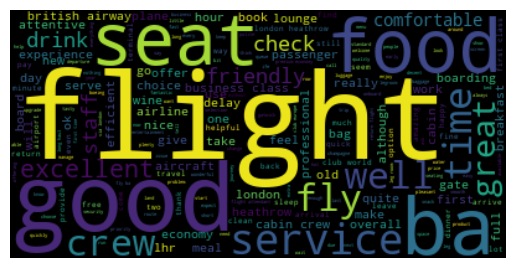

In [414]:
text = " "
for ind in df_sentiment.index:
    if df_sentiment['tag'][ind] == "Positive":
        text = text + df_sentiment['review_processed'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

the most frequent word on positive sentiment is `flight`, `good`, `foof`, `seat`, `service`, `time`

- **'Flight':**
  - This term likely indicates a positive sentiment related to the flight experience, suggesting that the flight aspect is a notable aspect contributing to positive reviews.

- **'Good':**
  - The word 'good' is a general positive sentiment indicator, reflecting overall positive experiences and satisfaction in the reviews.

- **'Food':**
  - The mention of 'food' suggests that positive sentiment might be linked to a favorable dining or food service experience during the flight.

- **'Seat':**
  - 'Seat' is likely associated with comfort and satisfaction regarding seating arrangements, contributing to positive feedback.

- **'Service':**
  - The inclusion of 'service' implies positive sentiment is influenced by favorable interactions with the airline's service staff.

- **'Time':**
  - 'Time' could be linked to on-time performance, indicating positive sentiment when flights operate punctually.

By identifying and emphasizing these frequent words in the positive sentiment reviews, the WordCloud visualization provides a quick and intuitive way to grasp the significant aspects that contribute to positive experiences and sentiments expressed by customers. Understanding these key terms helps in pinpointing the factors that contribute to a positive perception of the airline's services and operations.

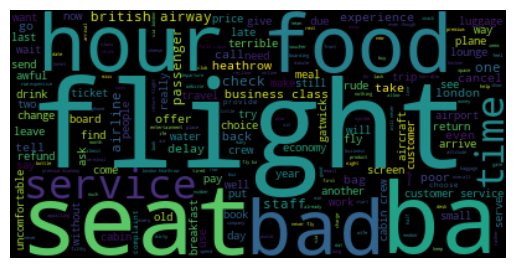

In [214]:
text = " "
for ind in df_sentiment.index:
    if df_sentiment['tag'][ind] == "Negative":
        text = text + df_sentiment['review_processed'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

the most frequent word on neutral sentiment is `flight`, `seat`, `foof`, `hourt`, `bad`, `time`

These terms provide insights into the aspects that are commonly discussed in a neutral tone, aiding in understanding the various neutral aspects of the airline's services and operations.

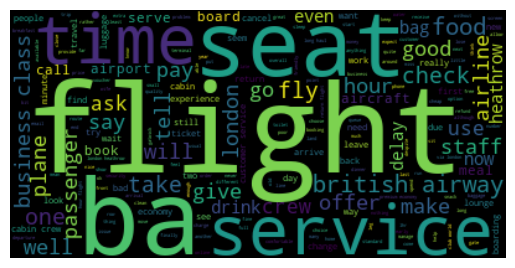

In [215]:
text = " "
for ind in df_sentiment.index:
    if df_sentiment['tag'][ind] == "Neutral":
        text = text + df_sentiment['review_processed'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

the most frequent word on negative sentiment is `flight`, `seat`, `ba`, `time`, `service`

- **'Flight':**
  - The term 'flight' being a frequent word in negative sentiment reviews suggests that flight experiences are a prominent factor contributing to negative feedback.

- **'Seat':**
  - Frequent mentions of 'seat' indicate that seating arrangements and comfort are often sources of dissatisfaction or critique in negative reviews.

- **'BA' (British Airways):**
  - 'BA' likely refers to British Airways, specifically highlighting the airline's name. Frequent mention may suggest specific criticism or negative feedback about the airline.

- **'Time':**
  - The term 'time' might refer to dissatisfaction with flight duration, delays, or other time-related issues, which are common concerns in negative reviews.

- **'Service':**
  - Frequent references to 'service' highlight dissatisfaction with the service quality provided by the airline, indicating that service-related issues are a significant aspect of negative sentiment.

The WordCloud visualization provides a quick and intuitive way to understand the critical aspects that contribute to negative experiences and sentiments expressed by customers. Recognizing these key terms is vital for addressing specific areas of improvement within the airline's services and operations.

# Topic Modelling

In [416]:
# This code selects the 'review_processed' column from the DataFrame 'df_sentiment' and stores it in a new DataFrame 'df_topic'.
df_topic = df_sentiment[['review_processed']]

In [242]:
df_topic

,review_processed
0,have flight from miami florida to dublin irela...
1,we start our day with ba in prague the flight ...
2,fly british airways weekly not because want to...
3,everything be ok until our connect flight in l...
4,my initial flight be cancel hour prior the fli...
...,...
1995,have pre booked seat and on take seat notice r...
1996,london heathrow to las vegas outbound great we...
1997,tokyo haneda to london and british airways be ...
1998,have perfectly satisfactory flight with britis...


The provided code performs topic modeling using Latent Dirichlet Allocation (LDA) on preprocessed text data. Here's a description of the purpose of this syntax:

1. **Vectorizing Text using TF-IDF (Term Frequency-Inverse Document Frequency):**
   - The `CountVectorizer` is used to transform the preprocessed review text into a numerical format suitable for analysis. It converts the text into a matrix of token counts.
   - `max_df=0.95` and `min_df=2` are parameters used to ignore terms that are too frequent or infrequent, helping to focus on relevant words.
   - `stop_words='english'` eliminates common English stop words (e.g., 'and', 'the') that typically carry little meaning.

2. **Applying LDA Model:**
   - LDA, a probabilistic model, is utilized to identify topics in the preprocessed text.
   - `n_components` (set to 10 in this case) defines the number of topics the model should identify. This value can be adjusted based on the desired granularity of topics.

3. **Calculating Topic Distribution for Each Document:**
   - The LDA model is used to compute the topic distribution for each document, indicating the probability of each document belonging to a particular topic.

4. **Assigning the Most Probable Topic to Each Document:**
   - The most probable topic for each document is assigned based on the topic distribution probabilities.

5. **Extracting Top Words for Each Topic:**
   - For each identified topic, the code extracts the top words based on their weights in the LDA model.
   - These top words help to interpret and label each topic.

6. **Displaying the Results:**
   - The code organizes and displays the top words for each topic in a DataFrame (`topics_df`) and prints this information for analysis and interpretation.
   - It also prints the assigned topics for each document, enabling a quick understanding of the document-topic associations.

Overall, this code is aimed at uncovering and organizing topics present in the preprocessed text data, allowing for better comprehension and analysis of the underlying themes within the reviews. The LDA model helps identify these topics and the most significant words associated with each one.

In [418]:
# Vectorize the text using TF-IDF
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_topic['review_processed'])

# Apply LDA Model
num_topics = 10  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the topic distribution for each document
topic_distribution = lda.transform(dtm)

# Assign the most probable topic to each document
df_topic['Topic'] = topic_distribution.argmax(axis=1) + 1  # Adding 1 to match topic numbering

# Get the top words for each topic and concatenate them
feature_names = vectorizer.get_feature_names_out()
topics_dict = {}

for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics_dict[f'Topic {topic_idx + 1}'] = ', '.join(top_words)

# Create a DataFrame from the topics dictionary
topics_df = pd.DataFrame(topics_dict.values(), index=topics_dict.keys(), columns=["Top Words"])

# Display the DataFrame with top words for each topic
print("Top Words for Each Topic:")
print(topics_df)
print("\nAssigned Topics for Each Document:")
print(df_topic[['review_processed', 'Topic']])

Top Words for Each Topic:
                                                                        Top Words
Topic 1   ba, british, bag, airways, london, fly, flight, check, service, day    
Topic 2   flight, good, time, seat, crew, lounge, cabin, food, check, drink      
Topic 3   flight, ba, airline, fly, food, heathrow, service, british, good, staff
Topic 4   flight, crew, ba, service, time, cabin, london, good, food, fly        
Topic 5   seat, class, flight, business, meal, ba, food, cabin, serve, london    
Topic 6   flight, ba, customer, book, tell, cancel, refund, pay, seat, ticket    
Topic 7   service, crew, drink, fast, ba, economy, premium, toronto, cabin, serve
Topic 8   class, ba, business, seat, service, club, lounge, flight, food, cabin  
Topic 9   flight, hour, delay, check, airport, staff, luggage, london, tell, wait
Topic 10  seat, flight, ba, economy, service, airline, fly, food, london, pay    

Assigned Topics for Each Document:
                                    

C:\Users\Wawan'\AppData\Local\Temp\ipykernel_4168\1828916803.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['Topic'] = topic_distribution.argmax(axis=1) + 1  # Adding 1 to match topic numbering


In [419]:
# Set the display option to show full content without truncation
pd.set_option('display.max_colwidth', -1)

# Display the DataFrame
topics_df.head(10)

C:\Users\Wawan'\AppData\Local\Temp\ipykernel_4168\424545132.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Top Words
Topic 1,"ba, british, bag, airways, london, fly, flight, check, service, day"
Topic 2,"flight, good, time, seat, crew, lounge, cabin, food, check, drink"
Topic 3,"flight, ba, airline, fly, food, heathrow, service, british, good, staff"
Topic 4,"flight, crew, ba, service, time, cabin, london, good, food, fly"
Topic 5,"seat, class, flight, business, meal, ba, food, cabin, serve, london"
Topic 6,"flight, ba, customer, book, tell, cancel, refund, pay, seat, ticket"
Topic 7,"service, crew, drink, fast, ba, economy, premium, toronto, cabin, serve"
Topic 8,"class, ba, business, seat, service, club, lounge, flight, food, cabin"
Topic 9,"flight, hour, delay, check, airport, staff, luggage, london, tell, wait"
Topic 10,"seat, flight, ba, economy, service, airline, fly, food, london, pay"


Based on the provided "Top Words" for each topic, we can derive a general topic for each one. Here are the general topics for each topic based on the keywords:

1. Topic 1: **Airline Services**
   - Keywords: ba, british, bag, airways, london, fly, flight, check, service, day

2. Topic 2: **In-Flight Experience**
   - Keywords: flight, good, time, seat, crew, lounge, cabin, food, check, drink

3. Topic 3: **Overall Flight Experience**
   - Keywords: flight, ba, airline, fly, food, heathrow, service, british, good, staff

4. Topic 4: **In-Flight Service**
   - Keywords: flight, crew, ba, service, time, cabin, london, good, food, fly

5. Topic 5: **Cabin and Seating**
   - Keywords: seat, class, flight, business, meal, ba, food, cabin, serve, london

6. Topic 6: **Booking and Customer Service**
   - Keywords: flight, ba, customer, book, tell, cancel, refund, pay, seat, ticket

7. Topic 7: **In-Flight Service**
   - Keywords: service, crew, drink, fast, ba, economy, premium, toronto, cabin, serve

8. Topic 8: **Business Class Experience**
   - Keywords: class, ba, business, seat, service, club, lounge, flight, food, cabin

9. Topic 9: **Flight Delays and Wait Time**
   - Keywords: flight, hour, delay, check, airport, staff, luggage, london, tell, wait

10. Topic 10: **Economy Class Experience**
    - Keywords: seat, flight, ba, economy, service, airline, fly, food, london, pay

Please note that these general topics are derived based on the provided keywords and may not perfectly capture the essence of each topic. It's important to consider the context and specific use case for a more accurate categorization.

In [420]:
general_topic = ['Airline Services', 'In-Flight Experience', 'Overall Flight Experience', 'In-Flight Experience', 'Cabin and Seating', 'Booking and Customer Service', 'In-Flight Service', 'Business Class Experience', 'Flight Delays and Wait Time', 'Economy Class Experience']
topics_df['general_topic'] = general_topic

In [421]:
topics_df

,Top Words,general_topic
Topic 1,"ba, british, bag, airways, london, fly, flight, check, service, day",Airline Services
Topic 2,"flight, good, time, seat, crew, lounge, cabin, food, check, drink",In-Flight Experience
Topic 3,"flight, ba, airline, fly, food, heathrow, service, british, good, staff",Overall Flight Experience
Topic 4,"flight, crew, ba, service, time, cabin, london, good, food, fly",In-Flight Experience
Topic 5,"seat, class, flight, business, meal, ba, food, cabin, serve, london",Cabin and Seating
Topic 6,"flight, ba, customer, book, tell, cancel, refund, pay, seat, ticket",Booking and Customer Service
Topic 7,"service, crew, drink, fast, ba, economy, premium, toronto, cabin, serve",In-Flight Service
Topic 8,"class, ba, business, seat, service, club, lounge, flight, food, cabin",Business Class Experience
Topic 9,"flight, hour, delay, check, airport, staff, luggage, london, tell, wait",Flight Delays and Wait Time
Topic 10,"seat, flight, ba, economy, service, airline, fly, food, london, pay",Economy Class Experience


In [422]:
topics_df.reset_index(inplace=True)

In [423]:
topics_df['index'] = topics_df['index'].astype(str)
topics_df['index'] = topics_df['index'].str.replace('Topic ', '')

In [424]:
topics_df

,index,Top Words,general_topic
0,1,"ba, british, bag, airways, london, fly, flight, check, service, day",Airline Services
1,2,"flight, good, time, seat, crew, lounge, cabin, food, check, drink",In-Flight Experience
2,3,"flight, ba, airline, fly, food, heathrow, service, british, good, staff",Overall Flight Experience
3,4,"flight, crew, ba, service, time, cabin, london, good, food, fly",In-Flight Experience
4,5,"seat, class, flight, business, meal, ba, food, cabin, serve, london",Cabin and Seating
5,6,"flight, ba, customer, book, tell, cancel, refund, pay, seat, ticket",Booking and Customer Service
6,7,"service, crew, drink, fast, ba, economy, premium, toronto, cabin, serve",In-Flight Service
7,8,"class, ba, business, seat, service, club, lounge, flight, food, cabin",Business Class Experience
8,9,"flight, hour, delay, check, airport, staff, luggage, london, tell, wait",Flight Delays and Wait Time
9,10,"seat, flight, ba, economy, service, airline, fly, food, london, pay",Economy Class Experience


In [425]:
# To reset to the default behavior (truncate content if too long)
pd.reset_option('display.max_colwidth')
df_topic

,review_processed,Topic
0,have flight from miami florida to dublin irela...,9
1,we start our day with ba in prague the flight ...,5
2,fly british airways weekly not because want to...,3
3,everything be ok until our connect flight in l...,9
4,my initial flight be cancel hour prior the fli...,9
...,...,...
1995,have pre booked seat and on take seat notice r...,5
1996,london heathrow to las vegas outbound great we...,5
1997,tokyo haneda to london and british airways be ...,10
1998,have perfectly satisfactory flight with britis...,2


In [426]:
df_topic['Topic'].value_counts()

10    353
2     303
6     237
5     214
9     208
3     208
4     175
8     167
1     115
7      20
Name: Topic, dtype: int64

topic 10 is the most topic occur in our data which is topic for economy class

apply topic modelling to our sentiment data for further analysis

In [428]:
df_sentiment['topic'] = topic_distribution.argmax(axis=1) + 1

In [429]:
df_sentiment

,Review,flightMonth,flightYear,review_processed,polarity,tag,topic
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative,9
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative,5
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Negative,3
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative,9
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative,9
...,...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Negative,5
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Negative,5
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative,10
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Negative,2


create dictionary about our topic category to assign with our df_sentiment

In [430]:
# Create a dictionary with column index as key and general topic as value
column_to_general_topic = dict(zip(topics_df['index'], topics_df['general_topic']))

In [431]:
column_to_general_topic

{'1': 'Airline Services',
 '2': 'In-Flight Experience',
 '3': 'Overall Flight Experience',
 '4': 'In-Flight Experience',
 '5': 'Cabin and Seating',
 '6': 'Booking and Customer Service',
 '7': 'In-Flight Service',
 '8': 'Business Class Experience',
 '9': 'Flight Delays and Wait Time',
 '10': 'Economy Class Experience'}

In [432]:
# Map the index (topic number) in df_main to 'general_topic' using the dictionary
df_sentiment['general_topic'] = df_sentiment['topic'].astype(str).map(column_to_general_topic)

# Display the updated main dataset with the 'general_topic'
df_sentiment

,Review,flightMonth,flightYear,review_processed,polarity,tag,topic,general_topic
0,"I had a flight from Miami, Florida to Dublin, ...",9,2023,have flight from miami florida to dublin irela...,-0.040625,Negative,9,Flight Delays and Wait Time
1,We started our day with BA in Prague. The flig...,9,2023,we start our day with ba in prague the flight ...,-0.123144,Negative,5,Cabin and Seating
2,I fly British Airways weekly not because I wan...,9,2023,fly british airways weekly not because want to...,0.148558,Negative,3,Overall Flight Experience
3,Everything was ok until our connecting flight ...,9,2023,everything be ok until our connect flight in l...,-0.088274,Negative,9,Flight Delays and Wait Time
4,My initial flight was cancelled 8 hours prior ...,9,2023,my initial flight be cancel hour prior the fli...,-0.045330,Negative,9,Flight Delays and Wait Time
...,...,...,...,...,...,...,...,...
1995,"Had pre-booked seat 14k and, on taking seat, n...",10,2016,have pre booked seat and on take seat notice r...,0.089286,Negative,5,Cabin and Seating
1996,London Heathrow to Las Vegas. Outbound great w...,10,2016,london heathrow to las vegas outbound great we...,0.152778,Negative,5,Cabin and Seating
1997,"Tokyo Haneda to London, and British Airways is...",10,2016,tokyo haneda to london and british airways be ...,-0.058281,Negative,10,Economy Class Experience
1998,I had a perfectly satisfactory flight with Bri...,10,2016,have perfectly satisfactory flight with britis...,0.143667,Negative,2,In-Flight Experience


double check distribution of our sentiment should same with our df_topic

In [298]:
df_sentiment['topic'].value_counts()

10    353
2     303
6     237
5     214
9     208
3     208
4     175
8     167
1     115
7      20
Name: topic, dtype: int64

total topic in our df_sentiment

In [296]:
df_sentiment['general_topic'].value_counts()

In-Flight Experience            478
Economy Class Experience        353
Booking and Customer Service    237
Cabin and Seating               214
Flight Delays and Wait Time     208
Overall Flight Experience       208
Business Class Experience       167
Airline Services                115
In-Flight Service                20
Name: general_topic, dtype: int64

In-Flight Experience become the most frequent topic due to merge same category 

# Topic Model Analyzing

### The most frequent topic in negative sentiment

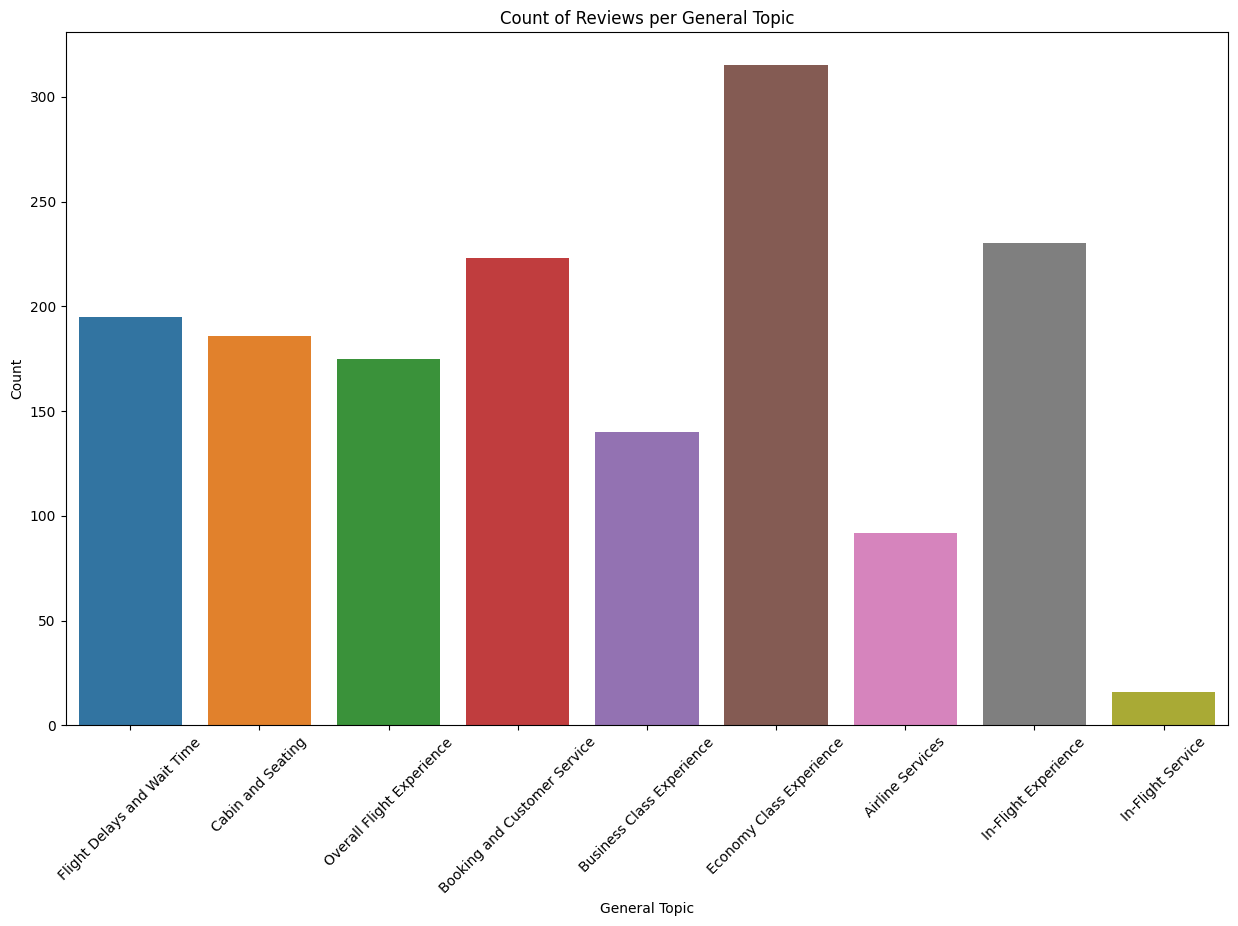

In [450]:
# Create the histogram plot
plt.figure(figsize=(15, 9))
sns.countplot(data=df_sentiment[df_sentiment['tag'] == 'Negative'], x="general_topic")
plt.xlabel('General Topic')
plt.ylabel('Count')
plt.title('Count of Reviews per General Topic')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Economy Class is the most critical aspect to have a negative sentiment follow by In-Flight Experience and Booking or Costumer Care

we will inspect one by one of all topic is year by year the British Airways have improvement or not regarding the topic

**In-Flight Experience year by year**

In [434]:
flight_exp = df_sentiment[df_sentiment['general_topic']== 'In-Flight Experience']

<Axes: xlabel='flightYear', ylabel='count'>

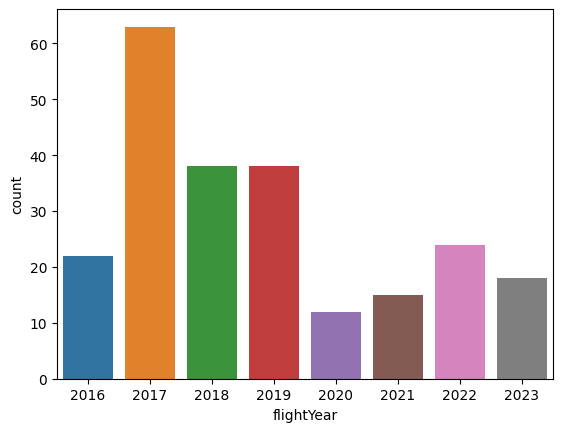

In [435]:
sns.countplot(data=flight_exp[flight_exp['tag'] == 'Negative'], x="flightYear")

the most negative comment appear in 2017 and show a significant improvement year by year

**Economy Class Experience year by year**

In [436]:
economy_exp = df_sentiment[df_sentiment['general_topic']== 'Economy Class Experience']

<Axes: xlabel='flightYear', ylabel='count'>

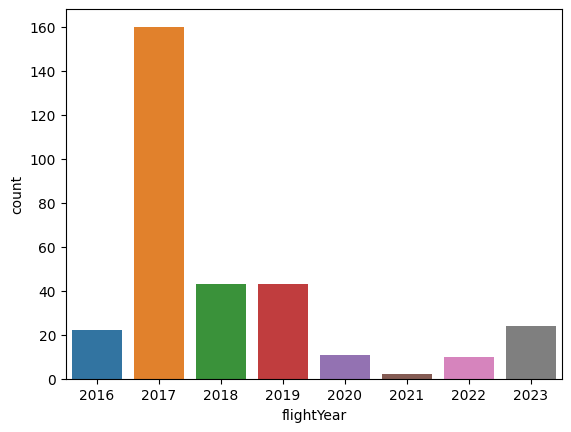

In [437]:
sns.countplot(data=economy_exp[economy_exp['tag'] == 'Negative'], x="flightYear")

the most negative comment appear in 2017 and show a significant improvement year by year

**Booking and Costumer Service year by year**

In [438]:
booking_exp = df_sentiment[df_sentiment['general_topic']== 'Booking and Customer Service']

<Axes: xlabel='flightYear', ylabel='count'>

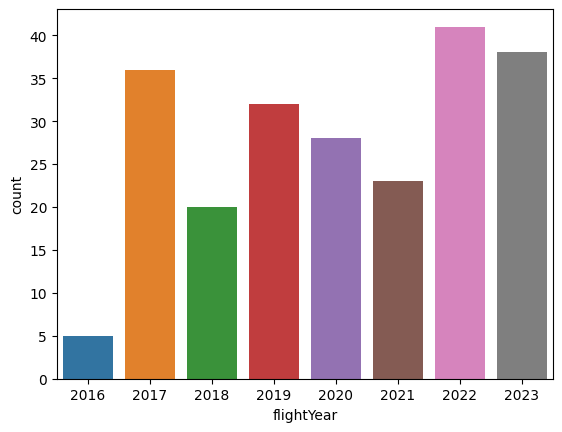

In [439]:
sns.countplot(data=booking_exp[booking_exp['tag'] == 'Negative'], x="flightYear")

Booking and Costumer Service year by year still show unimprovement due to still remain in high number and raise significant over the last 2 years

**Cabin and Seating**

In [440]:
cabin_exp = df_sentiment[df_sentiment['general_topic']== 'Cabin and Seating']

<Axes: xlabel='flightYear', ylabel='count'>

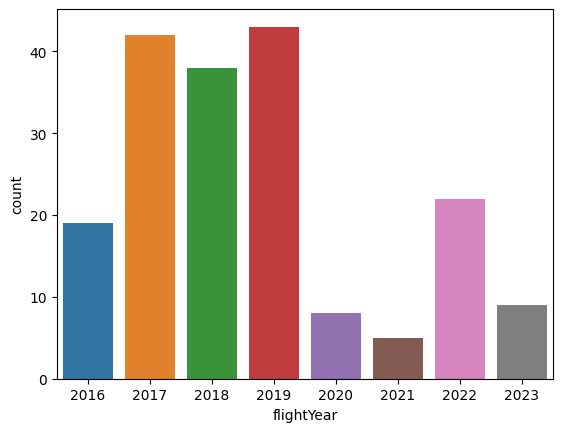

In [441]:
sns.countplot(data=cabin_exp[cabin_exp['tag'] == 'Negative'], x="flightYear")

Cabin Seating year by year show a high problem appear in 2017 until 2019, after that it shows improvemnt but British Airways still have to reatin the quality due to a significant raise on 2022

**Flight Delay and Wait Time**

In [442]:
delay_exp = df_sentiment[df_sentiment['general_topic']== 'Flight Delays and Wait Time']

<Axes: xlabel='flightYear', ylabel='count'>

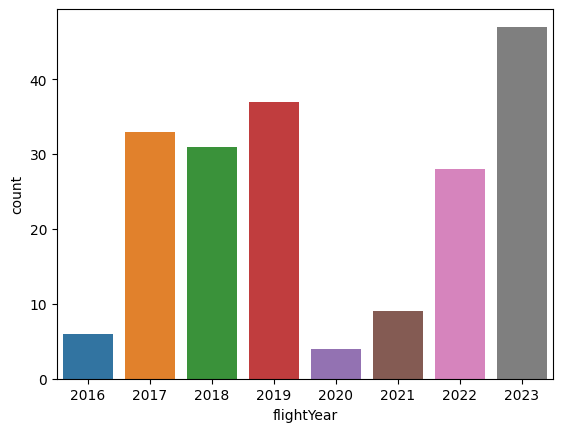

In [443]:
sns.countplot(data=delay_exp[delay_exp['tag'] == 'Negative'], x="flightYear")

it show that Fligth Delay and Wait Time have improvement but significantly raise as negative in the last 2 years, British Airways have to solve it immediately

**Overall Flight Experience**

In [444]:
overall_exp = df_sentiment[df_sentiment['general_topic']== 'Overall Flight Experience']

<Axes: xlabel='flightYear', ylabel='count'>

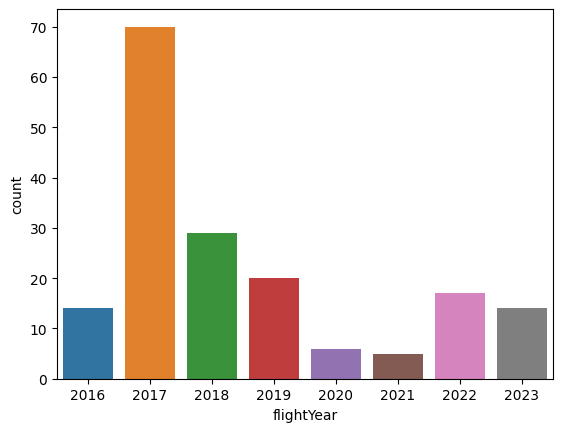

In [445]:
sns.countplot(data=overall_exp[overall_exp['tag'] == 'Negative'], x="flightYear")

Overall Flight Experience show improvement over year by year

**Business Class Experience**

In [446]:
business_exp = df_sentiment[df_sentiment['general_topic']== 'Business Class Experience']

<Axes: xlabel='flightYear', ylabel='count'>

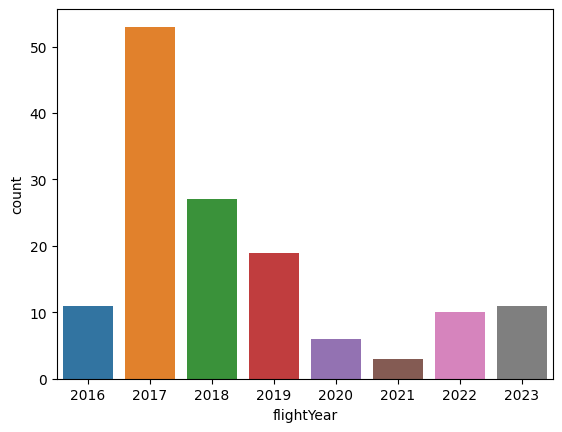

In [447]:
sns.countplot(data=business_exp[business_exp['tag'] == 'Negative'], x="flightYear")

Business Class Experience show improvement over year by year

**Airline Service**

In [448]:
airline_serv = df_sentiment[df_sentiment['general_topic']== 'Airline Services']

<Axes: xlabel='flightYear', ylabel='count'>

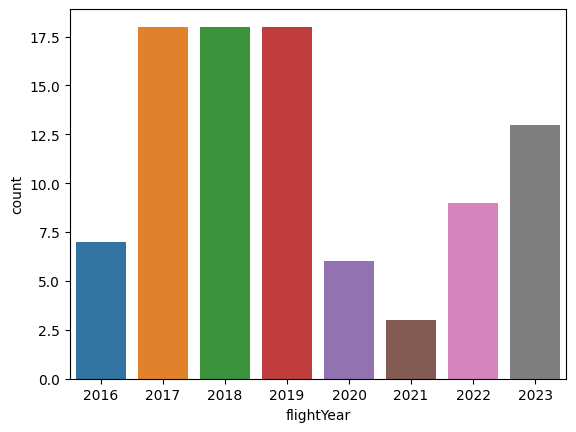

In [449]:
sns.countplot(data=airline_serv[airline_serv['tag'] == 'Negative'], x="flightYear")

negative sentiment for Airline Service over the last 2 years is raise significantly and should be investigate and solve immediatelly

### The most frequent topic in positive sentiment

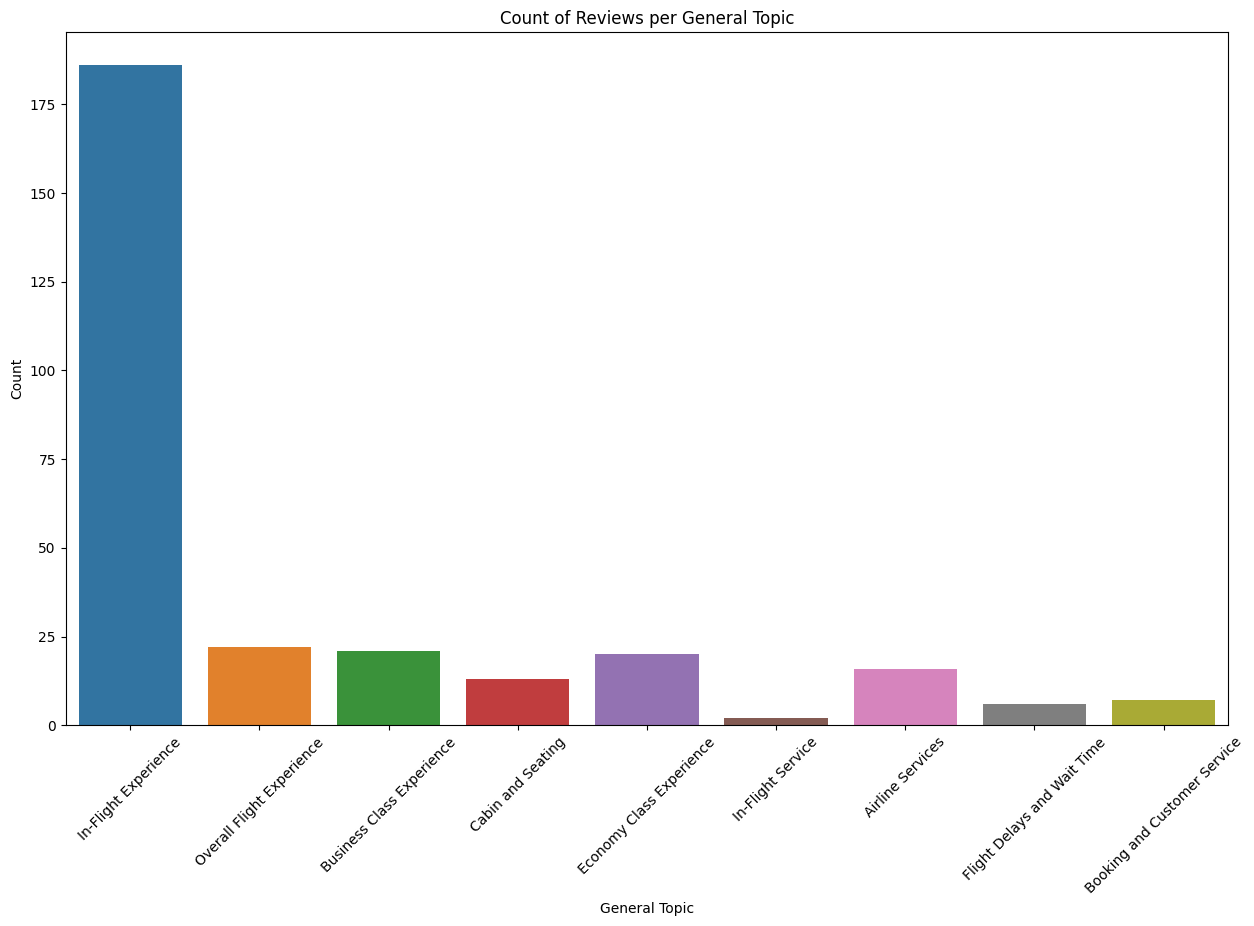

In [451]:
# Create the histogram plot
plt.figure(figsize=(15, 9))
sns.countplot(data=df_sentiment[df_sentiment['tag'] == 'Positive'], x="general_topic")
plt.xlabel('General Topic')
plt.ylabel('Count')
plt.title('Count of Reviews per General Topic')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

it show most of the positive comment comes from In-Flight experience, British Airways still have a lot aree to improve the business

### The most frequent topic in neutral sentiment

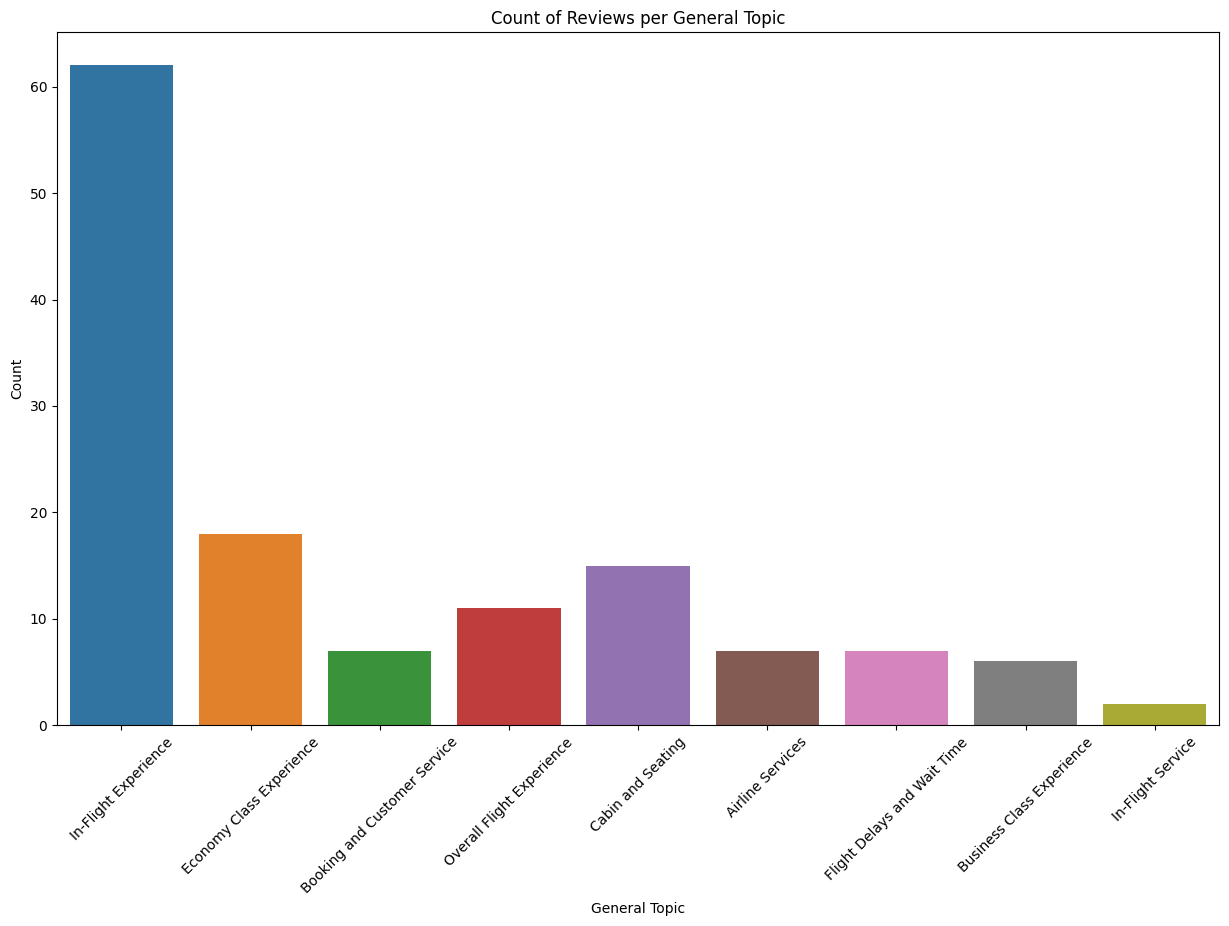

In [452]:
# Create the histogram plot
plt.figure(figsize=(15, 9))
sns.countplot(data=df_sentiment[df_sentiment['tag'] == 'Neutral'], x="general_topic")
plt.xlabel('General Topic')
plt.ylabel('Count')
plt.title('Count of Reviews per General Topic')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

since neutral show not negative or positive sentiment but neutral sentiment still can be a measured indicator way for British Aiways improvements

# Exploratory Data Analysis Conclusion

1. Negative sentiment is 78.6% from all data review that has been record
2. Economy Class is the most critical aspect to have a negative sentiment follow by In-Flight Experience and Booking or Costumer Care
3. Booking and Costumer Service year by year still show unimprovement due to still remain in high number and raise significant over the last 2 years
4. Cabin Seating year by year show a high problem appear in 2017 until 2019, after that it shows improvemnt but British Airways still have to reatin the quality due to a significant raise on 2022
5. it show that Fligth Delay and Wait Time have improvement but significantly raise as negative in the last 2 years, British Airways have to solve it immediately
6. negative sentiment for Airline Service over the last 2 years is raise significantly and should be investigate and solve immediatelly
7. it show most of the positive comment comes from In-Flight experience, British Airways still have a lot aree to improve the business such as Airline Services, In-Flight Experience, Overall Flight Experience, In-Flight Experience, Cabin and Seating, Booking and Customer Service, Business Class Experience, Flight Delays and Wait Time, Economy Class Experience

# EDA Advice

Based on the EDA conclusions, here are some recommendations and advice to consider:

1. **Address Negative Sentiment Proactively:**
   - Given that a significant portion of the reviews express negative sentiment, it's crucial to address these concerns proactively. Understand the root causes and work on improving the mentioned aspects.

2. **Focus on Economy Class and In-Flight Experience:**
   - Since Economy Class and In-Flight Experience are highlighted as critical aspects with negative sentiment, allocate resources and efforts to enhance these areas. Consider gathering more specific feedback to identify precise pain points.

3. **Prioritize Booking and Customer Service Improvements:**
   - Given the lack of improvement in Booking and Customer Service over the years, prioritize efforts to enhance these services. Streamline booking processes and invest in customer service training and support.

4. **Monitor and Sustain Cabin Seating Quality:**
   - Although there was an improvement in cabin seating from 2019 onwards, sustain this progress and ensure consistent quality. Monitor trends and address any spikes in negative feedback promptly.

5. **Mitigate Flight Delay and Wait Time Concerns:**
   - Address the significant rise in negative sentiment regarding flight delays and wait times over the last two years. Streamline operations, improve scheduling, and communicate effectively with passengers to manage expectations.

6. **Investigate and Address Decline in Airline Service Sentiment:**
   - The significant increase in negative sentiment towards airline service over the past two years warrants immediate investigation. Understand the specific issues contributing to this decline and develop strategies to enhance the overall airline service.

7. **Holistic Improvement Strategy:**
   - Given the diverse areas for improvement identified in the analysis, create a comprehensive improvement strategy that focuses on enhancing various aspects of the business. Prioritize actions based on impact and feasibility.

8. **Leverage Positive Feedback for Reinforcement:**
   - Use the positive comments related to In-Flight Experience as a blueprint for improvement. Identify what aspects are being appreciated and extend these positive aspects to other areas of the business.

9. **Engage with Customers for Feedback:**
   - Implement mechanisms to gather real-time feedback from customers during their journey. Use this feedback to make immediate improvements and adjustments to services and experiences.

10. **Measure and Track Progress:**
   - Establish key performance indicators (KPIs) to measure the impact of your improvement initiatives. Regularly track and analyze data to ensure that changes made are leading to positive outcomes.

By taking these actions, British Airways can work towards enhancing customer satisfaction, addressing negative sentiment, and improving overall passenger experiences.